In [73]:
#Imports math para usar factoriales, numpy para usar arreglos calcular su producto punto y matplotlib.pyplot para graficar
#las curvas.
from sympy import * 
import math
import numpy as np
import matplotlib.pyplot as plt

In [74]:
#Se calcula la combinacion sin repetecion de i con n.
def combinacion(i, n):
    return math.factorial(n) / float(
        math.factorial(i) * math.factorial(n - i))

In [75]:
#Se calcula el polinomio de bernstein mediante su formula.
def pol_bernstein(t, i, n):
    return combinacion(i, n) * (t)**i * ((1-t)**(n-i))

In [76]:
#Se calcula el rango de puntos para la curva de bezier
def curva_bezier(puntos,precision):
    n = len(puntos)   #Tamaño del arreglo de tuplas de los puntos de control
    
    x = np.array([p[0] for p in puntos]) #Se guarda cada valor de la posicion 0(valores de x) de cada tupla en el arreglo puntos
    y = np.array([p[1] for p in puntos]) #Se guarda cada valor de la posicion 1(valores de y) de cada tupla en el arreglo puntos
    
    t = np.linspace(0.0, 1.0, precision)   #Se crea un vector que contiene una cantidad de numeros especificada para una mejor                                   #precision además, todas las polinomiales toman valores entre 0<=t<=1
    
    pBernstein = np.array([pol_bernstein(t,i, n-1) for i in range(0, n)])   #Se guarda en el arreglo pBernstein el polinomio
                                                                           #de bernstein obtenido de pol+bernstein

    px = np.dot(x, pBernstein)   #Se hace producto punto de los arreglos x con el polinomio de bernstein 
    py = np.dot(y, pBernstein)   #Se hace producto punto de los arreglos y con el polinomio de bernstein 
    
    return px, py   #Retorna los arreglos px y py

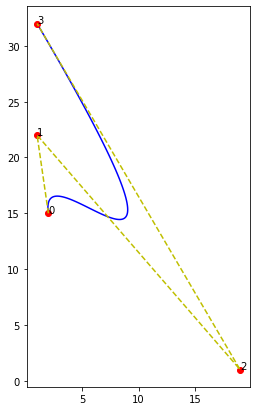

In [77]:
#Aca se corre el programa.
puntos = [(2,15),(1,22),(19,1),(1,32)]    #Se declara un arreglo de tuplas con las coordenadas o puntos de control de bazier
x = [p[0] for p in puntos]              #Se guarda cada valor de la posicion 0(valores de x) de cada tupla en el arreglo puntos 
y = [p[1] for p in puntos]              #Se guarda cada valor de la posicion 1(valores de y) de cada tupla en el arreglo puntos

px, py = curva_bezier(puntos, precision=100)  #Se guarda en px y py cada valor del rango de puntos que seguira para la curva 
                                               #de bezier para ser graficada
    
plt.figure(figsize=(4, 7))    #Tamaño el plano para graficar
plt.plot(px, py,"b")              #Con el rango de puntos px y py se dibuja la linea de la curva de bezier 
plt.plot(x, y, "ro")          #Se dibujan los puntos de control de la curva de bezier
plt.plot(x, y, "y--")          #Se dibuja la linea de puntos que une los puntos de control
for punto in range(len(puntos)): #Se identifica cada punto de control con su numero respectivo
    plt.text(puntos[punto][0], puntos[punto][1], punto)

plt.show() #Se muestra el grafico